<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Generalized Regression and Feature Selection
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2021</b> <br>
    <b>Lab03.01 - 07/04/2021<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a><br>
    </div>
    </td>
    <td width="100px"> 
        <a href=http://chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio>
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

# Linear Regression with Scikit-Learn

Scikit-learn is one of the most complete machine learning frameworks available in Python. It provides efficient implementations of a large number of algorithms, it is very well documented and provides a clean and uniform API.

A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

### Data Format

Scikit-Learn is based on Numpy arrays and it also supports Pandas DataFrames.
We usually interact with the Scikit-Learn API using two (or three) distinct matrices:

- **Feature matrix**: It contains all the samples in our training set and, for each sample, it specifies all its features (i.e., its attributes). It is usually  referred as ``X`` in Scikit-Learn functions and it is assumed to be of shape ``[n_samples, n_features]``. That is, rows represent samples whereas colums the different features.

- **Target array**: In supervised tasks an additional, distinct, array is required to specify the target value we want to learn. It is usually called ``y`` and it must have shape ``[n_samples, n_targets]`` (tipically ``[n_samples, 1]`` or even ``[n_samples]``)

## Scikit-learn API

Almost all the Scikit-Learn predictior objects share the same API. Based on the type of predictior (e.g., supervised vs unsupervised), however, some methods or attributes may not be implemented or used.

In general, we interact with the API with the following steps:

- **Model selection**: we choose a particular model, i.e., we import its class from Scikit-Learn
- **Hyperparameter selection**: we choose the parameters (e.g., number of clusters, the N parameter in KNN) creating a particular instance of the predictior
- **Data processing**: we arrage data into a feature matrix ``X`` and a set of target values ``y``, eventually splitting the dataset into training, validation and test sets
- **Model fitting**: we train the model calling the ``estimator.fit(X, y)`` method
- **Test/inference on new data**: we apply the model on test samples to validate its performance. We generally use the ``estimator.predict(X_test)`` function for that.

Let's compare the results we obtained by implementing the least squares solution from scratch with the scikit-learn solution

``` 
 Linear Regression using all features
        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept         2.939           0.3119    9.42   0.0000       True
1         TV         0.046           0.0014   32.81   0.0000       True
2      Radio         0.189           0.0086   21.89   0.0000       True
3  Newspaper        -0.001           0.0059   -0.18   0.8599      False
RSS: 556.8252629021872
MSE: 2.784126314510936
```

In [30]:
# Read the data and creates a pandas DataFrame
adv_data = pd.read_csv("data/Advertising.csv")
# Print the first few raws of the dataset
print(adv_data.head())
# Remove the first column (ID)
adv_data = adv_data[['TV', 'Radio', 'Newspaper', 'Sales']]
print(adv_data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [31]:
# Prepare the data
X_fetures = ['TV', 'Radio', 'Newspaper']
X = adv_data[X_fetures].to_numpy()  # X.shape = [200, 3]
y = adv_data['Sales'].to_numpy()    # y.shape = [200]
print(X.shape, y.shape)

(200, 3) (200,)


### Train

In [32]:
from sklearn.linear_model import LinearRegression  # 1- model selection
model = LinearRegression(fit_intercept=True)       # 2- hyperparams
model.fit(X, y)                                    # 3- model fitting
y_predict = model.predict(X)                       # 4- model testing

LinearRegression()

You can inspect the learned parameters by using the `intercept_` and `coef_` attributes of the model

In [33]:
print("The intercept is {:0.3f}".format(model.intercept_))
for idx, col_name in enumerate(X_fetures):
    print("The coefficient for {} is {:0.3f}".format(col_name, model.coef_[idx]))

The intercept is 2.939
The coefficient for TV is 0.046
The coefficient for Radio is 0.189
The coefficient for Newspaper is -0.001


In [34]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y, y_predict))
print("MSE score ", mean_squared_error(y, y_predict))

R2 score  0.8972106381789522
MSE score  2.784126314510936


## Exercise - MPG (Miles per Gallon) dataset

The MPG dataset relates cars (and their characteristics) with their efficiency in terms of miles per gallon. Regression task: given the cars characteristics, we want to predict its mpg value. 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reads the dataset from csv
mpg = pd.read_csv('data/mpg_data.csv')
print(mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


### Missing Values
The 'horsepower' column contains some missing values, denoted as '?' strings. Since only few samples contain missing values, we can safely remove them and perform training on the remaining samples

In [36]:
# Show rows having horsepower = '?'
mpg[mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [37]:
# Remove rows with '?' horsepower
mpg = mpg[mpg['horsepower'] != '?']

We can now remove the 'name' column, since it doesn't provide much information, and split the table into ***X***, features, and ***y***, target, numpy arrays.

In [38]:
# Removes column named 'name'
mpg = mpg.drop('name', axis=1)
# Make sure features are floats
mpg = mpg.astype(np.float32)

In [39]:
# Split X and y
# X all the columns except 'mpg'
X_all_features = ['cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model_year', 'origin']
X = mpg[X_all_features].to_numpy()
# y just the 'mpg' column
y = mpg['mpg'].to_numpy()

print("X.shape", X.shape, "X.dtype", X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (392, 7) X.dtype float32
y.shape (392,) y.dtype float32


### Split data

We can now split data into training and test sets

In [40]:
from sklearn.model_selection import train_test_split

mpg_test_size = 0.3
mpg_test_seed = 40
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=mpg_test_size, 
                                                    random_state=mpg_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (274, 7)
X_test.shape  (118, 7)


## Linear Regression


In [41]:
from sklearn.linear_model import LinearRegression

# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X_train, y_train)          # 2- model fitting
y_predict_test = model.predict(X_test)       # 3- prediction
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.8308903174190425
Train MSE score  10.525302
Test R2 score  0.7862240553159648
Test MSE score  12.223115


In [42]:
for idx, col_name in enumerate(X_all_features):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for cylinders is -0.46854445338249207
The coefficient for displacement is 0.02681313455104828
The coefficient for horsepower is -0.0010997308418154716
The coefficient for weight is -0.0075813177973032
The coefficient for acceleration is 0.2447568029165268
The coefficient for model_year is 0.8461540341377258
The coefficient for origin is 1.4870076179504395
The intercept is -26.922


In [43]:
# ===============================================
#        Code from Lab02.01 - 24/03/2021
# 02.01.StatisticalLearningLinearRegression.ipynb
# ===============================================
from scipy.stats import t, f

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    # Helper function that uses scikit-learn models
    # and behaves as the function we implemented in
    # Lab02.01
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
    
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [44]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_all_features], alpha=0.001)

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-26.921963,5.560220,-4.841888,2.180076e-06,True
1,cylinders,-0.468544,0.398713,-1.175142,2.409848e-01,False
2,displacement,0.026813,0.009569,2.801973,5.450977e-03,False
3,horsepower,-0.001100,0.017137,-0.064172,9.488813e-01,False
4,weight,-0.007581,0.000843,-8.994592,4.513267e-17,True
5,acceleration,0.244757,0.120375,2.033289,4.301229e-02,False
6,model_year,0.846154,0.060575,13.968642,1.167998e-33,True
7,origin,1.487008,0.326320,4.556900,7.906965e-06,True


The t-test for some features failed, meaning that we had not enough statistical evidence to reject the null hypothesis (we have no evidence to say that these features, alone, are correlated with the observation). Let's perform an F-test to check if the subset of all these features, combined, is informative to perform a good prediction.

In [45]:
alpha = 0.001
X_all_features = ['cylinders', 'displacement', 'horsepower',
                  'weight', 'acceleration', 'model_year', 'origin']
# The Ftest_restricted function expect an input data that is a Pandas
# array (since it will use strings to select the restricted model's features)
# However X_train is a numpy array. Let's convert it back to Pandas
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
y_train_pd = pd.DataFrame(y_train)

features = ['cylinders', 'displacement', 'horsepower', 'acceleration']
p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")

p-value = 0.0246921375351753
F-stat = 2.8417651999714204
Do not Reject H0: There is NO evidence to say that at least one of the S features is useful


In [46]:
X_features = ['weight', 'model_year', 'origin']
X = mpg[X_features].to_numpy()

X_train_small, X_test_small, y_train, y_test = train_test_split(X, y,
                                                                test_size=mpg_test_size, 
                                                                random_state=mpg_test_seed)

model = LinearRegression()                       # 1- hyperparams selection
model = model.fit(X_train_small, y_train)        # 2- model fitting
y_predict_test = model.predict(X_test_small)     # 3- prediction
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.8236637067514821
Train MSE score  10.975081
Test R2 score  0.7979340835128499
Test MSE score  11.553569


```
Full model
Train R2 score  0.8308903174190425
Train MSE score  10.525302
Test R2 score  0.7862240553159648
Test MSE score  12.223115
```

# Polynomial Regression

One common way to increase the expressive power of linear models is to transform features using nonlinear functions. One option is to construct polynomial features from the coefficients.

In case of two features, the standard linear regression model fits a plane (ie, it finds the best plane that describe the data):

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$

If we combine features in second-order polynomials, we can fit a parabolod to the data instead on a simple plane.

**Notice: the model is still linear in the parameter!**

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

$\hat{y} = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Transform each feature into polynomial features based on the degree.
# Eg: in case of degree 2 we have the original features plus the product
# of each pair of features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train_small)

# Applies the transformation
X_train_poly = poly.transform(X_train_small)
X_test_poly = poly.transform(X_test_small)

# With degree 2 we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train_small.shape", X_train_small.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_train_small.shape", X_test_small.shape, " X_poly_train.shape", X_test_poly.shape)

X_train_small.shape (274, 3)  X_poly_train.shape (274, 9)
X_train_small.shape (118, 3)  X_poly_train.shape (118, 9)


**Note:** `PolynomialFeatures` by default has a `include_bias=True` which automatically adds an all-ones column, representing the case in which all features appear with 0 power. This in linear models act as an intercept.

We can either: 
- Add the additional all-ones features (`include_bias=True`) and use a `LinearRegressor(fit_intercept=False)`
- Or remove it (`include_bias=False`) and add it later with `LinearRegressor(fit_intercept=True)`

### Train

Once trained, we test the model performance on the test set

In [48]:
# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True)           
model.fit(X_train_poly, y_train)
y_predict = model.predict(X_test_poly)

LinearRegression()

### Model Evaluation

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y_test, y_predict))
print("MSE score ", mean_squared_error(y_test, y_predict))

R2 score  0.844369867097472
MSE score  8.8984995


```
Small Features Model
Train R2 score  0.8236637067514821
Train MSE score  10.975081
Test R2 score  0.7979340835128499
Test MSE score  11.553569

Full model
Train R2 score  0.8308903174190425
Train MSE score  10.525302
Test R2 score  0.7862240553159648
Test MSE score  12.223115
```

### Hyperparameters selection

Hyperparameter selection is a dark art. Algorithms performance highly depends on the choice we made for these parameters (and often also the agorithm itsef), but there is usually no obvious way to choose them. Techniques such as cross-validation, hold-out, grid-search come to us in aid. Thankfully, Scikit-learn already provides an implementation for most of them.

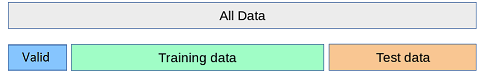

Let's first try to implement an hold-out validation ourself:


In [50]:
# Split the previous training set into two sets: train + validation
# In this case we create a validation set having the same size of the test set
X_trainR_small, X_val_small, y_trainR, y_val = train_test_split(X_train_small, y_train, 
                                                                test_size=y_test.shape[0],
                                                                random_state=mpg_test_seed)

We execute the same validation code as before, however we use the validation set, instead of the test set, to compute the performance of our model. We keep track of the best degree paramenter on the validation set, finally we train again the model using the best degree paramenter and all the training samples (train+validation). Finally, we compute the performance on the test set.

Note: in the following code we will use the **Pipeline** object which allows to automatically apply a sequence of transformations.

In [60]:
from sklearn.pipeline import Pipeline

degree = list(range(1,5))
test_scores = np.zeros(len(degree))
val_scores = np.zeros(len(degree))
train_scores = np.zeros(len(degree))

# Validation
for i, d in enumerate(degree):
    
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    
    model = model.fit(X_trainR_small, y_trainR)
    
    y_predict = model.predict(X_val_small)
    val_score = r2_score(y_val, y_predict)
    y_predict = model.predict(X_test_small)
    test_score = r2_score(y_test, y_predict)
    y_predict = model.predict(X_trainR_small)
    train_score = r2_score(y_trainR, y_predict)
    
    val_scores[i] = val_score
    test_scores[i] = test_score
    train_scores[i] = train_score

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small + X_val
model = model.fit(X_train_small, y_train)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Test score:", test_score)


Best degree:  4 
Val score:  0.8438032235619554
Test score: 0.8419171615946055


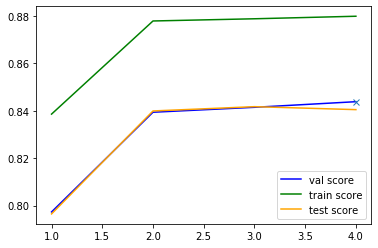

In [61]:
_ = plt.plot(degree,val_scores, label="val score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="g")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

# Cross Validation

Using a validation set is very useful to select values for hyper-parameters (i.e., parameters we cannot directly optimize with the training algorithm). However, our parameter selection is still limited to how good and general (or similar to the actual test set) our validation set is, especially if the training / validation set is small!

To select the best hyper-parameters that work well over most datasets (i.e., small variations of the dataset), we can simulate to have multiple training and validation sets. These are calld **folds**. We iteratively reserve a part of the training set for validation and train the model on the remaining data. 

**The overall validation score is the average score on all the validation sets.**

Simple validation: 
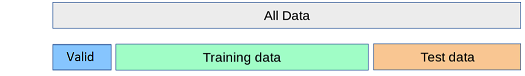

K-fold cross validation: 
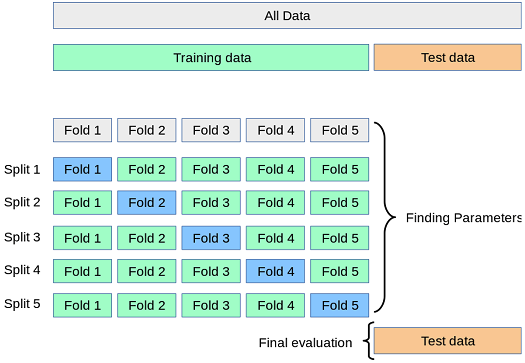

### The `cross_val_score` method

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score?

The `sklearn` package provides the `cross_val_score` function to perform model evaluation. The function, given a dataset, automatically:
- splits it into different folds
- trains the model on the training folds
- evaluate the model on the validation folds
- return as a result the validation scores computed on each split

**With the `scoring` argument we can control which metric is applied each time to compute the validation scores.**

In the most general case, `scoring` is a **function** having the following signature:
```python
def scorer(model, X, y):
    #...
    return score

```

Given a **metric**, i.e., a function with following signature:
```python
def metric(y_predict, y_true):
    #...
    return score

```
we can obtain a scorer using the `make_scorer` method.



Best degree:  3 
Val score:  0.8612872729305266
Test score: 0.8461981959659121


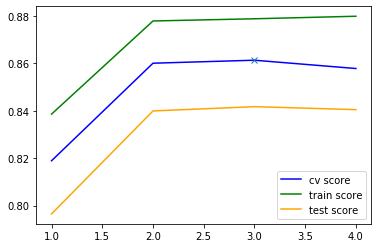

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# NOTE: same code as before, we just changed the way we
# compute the validation score. Instead on a single fold,
# we use a cross validation score for each possibility!
# Look at how 'val_score' is computed!
# NOTE: We don't need to explicitely train the model, the
# function will do it for us for each train split. Also
# train scores are not reported, only the cv score!
# ======================================================

# NOTE: The API always maximises the score, so score that
# must be minimized are retured as negative values!
r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)
# or ...
# mse_scorer = 'neg_mean_squared_error'

degree = list(range(1,5))
val_scores = np.zeros(len(degree))
# Validation
for i, d in enumerate(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    scores = cross_val_score(model, X_train_small, y_train, scoring=r2_scorer, cv=5)
    val_scores[i] = np.mean(scores)

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small + X_val
model = model.fit(np.concatenate([X_train_small]), np.concatenate([y_train]))
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Test score:", test_score)

_ = plt.plot(degree, val_scores, label="cv score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="green")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

### The `GridSearchCV` class

The `GridSearcCV` class performs cross validation while also searching among a set of different hyperparameters. We can substitute all the previous for loop on the degree variable with a single `GridSearcCV.fit()` call! We will obtain the same results!

In [75]:
from sklearn.model_selection import GridSearchCV

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,5))}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5, refit=True)
cv.fit(X_train_small, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring=make_scorer(r2_score))

In [76]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001602,0.000490,0.001001,0.000633,1,{'poly__degree': 1},0.878299,0.795058,0.780102,0.823303,0.817712,0.818895,0.033534,4
1,0.001800,0.000401,0.001401,0.000491,2,{'poly__degree': 2},0.911105,0.872830,0.818764,0.855290,0.842136,0.860025,0.031042,2
2,0.002003,0.000002,0.000999,0.000632,3,{'poly__degree': 3},0.916459,0.873619,0.816967,0.856570,0.842821,0.861287,0.033237,1
3,0.002599,0.000802,0.001400,0.000492,4,{'poly__degree': 4},0.911945,0.865229,0.817560,0.855537,0.838669,0.857788,0.031551,3


In [77]:
# Retrieve the best **trained** estimator
cv.best_estimator_
# Retrieve its parameters
cv.best_params_
# Retrieve the best **CV** score
# I.e., mean of the scores on each fold
cv.best_score_

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

{'poly__degree': 3}

0.8612872729305266

In [78]:
model = cv.best_estimator_
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Test score:", test_score)

Best degree: 3
Train score: 0.8612872729305266
Test score: 0.8461981959659121


Previous results obtained by implementing the loop from scratch:
```
Best degree:  3 
Val score:  0.8612872729305266
Test score: 0.8461981959659121
```

# Best Feature Subset Selection

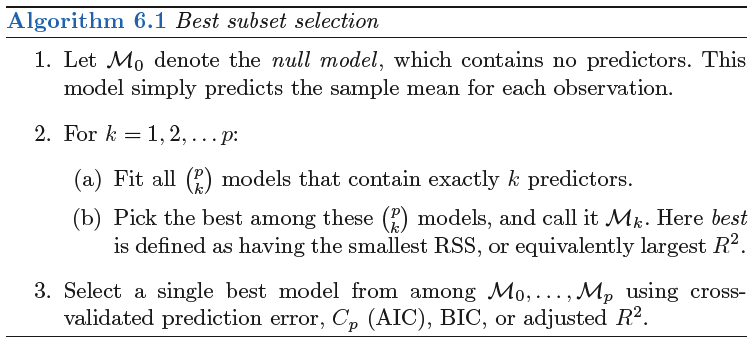

In [79]:
# Convert back from numpy arrays to data frames
# just for convenience, since we can use names to
# index features
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features)

In [80]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim)
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

subsets = get_subsets(X_train_pd, 1)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset

,cylinders
0,4.0
1,4.0
2,8.0
3,8.0
4,6.0


,displacement
0,116.0
1,78.0
2,400.0
3,302.0
4,250.0


A proper API for performing subset/forward/backward feature selection is currently missing in scikit-learn. In the following cells we are going to implement a general method that will allows us to experiment with different metrics without having to change much of the code.

This will involve, similarly to the `cross_val_score`, the assumption of working with functions having a specific signature. In particular, we will require the user to provide an `evaluator` function that is required to *train a model an evaluate it against a certain **training** set*.

```python
def evaluator(model, X, y, trained=False):
    #...
    return model, score
```

Let's create an helper function similar to the sklearn `make_scorer` that, given a scorer, generates the evaluator function that uses that scorer to evaluate the model.

In [81]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

Let's now implement the Subset Selection routine!

```python
def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     # Evaluator to be used at (2.b) + best criterion (np.argmin, np.argmax)
                     candidates_evaluator, candidates_argbest,
                     # Evaluator to be used at (3.) + best criterion (np.argmin, np.argmax)
                     subsets_evaluator, subsets_argbest,
                     # Evaluator to be used to test + best criterion (np.argmin, np.argmax)
                     test_evaluator=None, test_argbest=None,
                     candidates_scorer_name=None,  # Name of first figure (referring to 2.)
                     subsets_scorer_name=None,     # Name of second figure (referring to 3.)
                     verbose=True):  
```

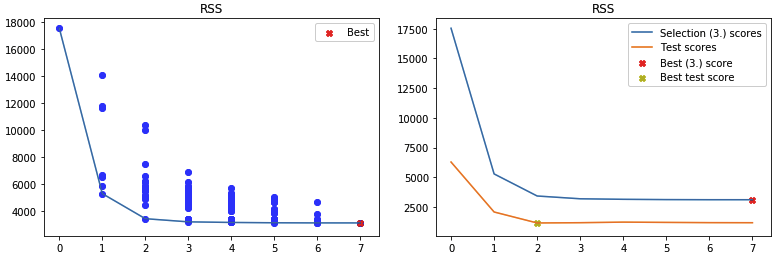

In [82]:
from sklearn.dummy import DummyRegressor

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                     subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                     test_evaluator=None, test_argbest=None, # Metric to be used on the test set
                     candidates_scorer_name=None,  # Name of 2. figure
                     subsets_scorer_name=None,     # Name of 3. figure
                     verbose=True, weight_step3=0):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = [] 
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A counter to keep track of the total number of trials
    
    # 1. and 2. Evaluate all Mk candidates with
    #           k=0...P features
    # =========================================
    for dim in range(num_features+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        dim_subsets = get_subsets(Xtrain_pd, dim=dim)
        for Xtrain_sub in dim_subsets:
            
            # Train the model on the subset
            if Xtrain_sub.shape[-1] == 0:
                # 1. Train the M0 model if the number of
                #    features is zero!
                # ======================================
                model = DummyRegressor()
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how the 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()


............
Best model (M0) with 0 features: []
M0 subset score (3.): 57.40102005004883
............
Best model (M1) with 1 features: ['weight']
M1 subset score (3.): 16.2602596282959
............
Best model (M2) with 2 features: ['weight', 'model_year']
M2 subset score (3.): 12.124746322631836
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin']
M3 subset score (3.): 11.553568840026855
............
Best model (M4) with 4 features: ['displacement', 'weight', 'model_year', 'origin']
M4 subset score (3.): 11.753463745117188
............
Best model (M5) with 5 features: ['displacement', 'weight', 'acceleration', 'model_year', 'origin']
M5 subset score (3.): 12.268588066101074
............
Best model (M6) with 6 features: ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
M6 subset score (3.): 12.241374969482422
............
Best model (M7) with 7 features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model

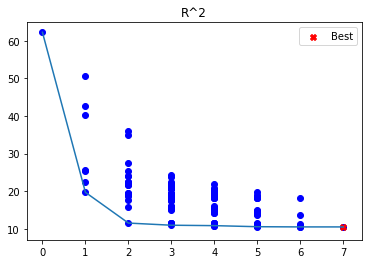

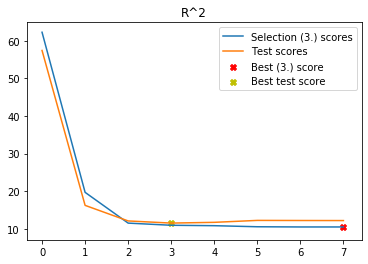

In [85]:
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="R^2",
                 subsets_scorer_name="R^2",
                 verbose=True)

#subset_selection(X_train_pd, y_train, X_test_pd, y_test,
#                 get_evaluator(make_scorer(rss)), np.argmin,
#                 get_evaluator(make_scorer(rss)), np.argmin,
#                 #get_evaluator(make_scorer(mean_squared_error)), np.argmin,
#                 candidates_scorer_name="RSS",
#                 subsets_scorer_name="RSS",
#                 verbose=False)

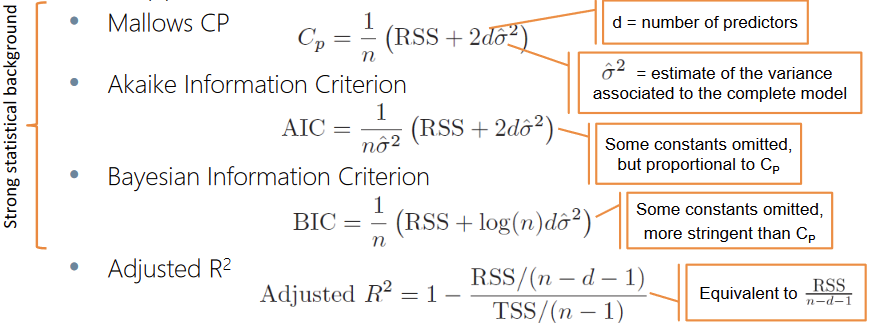

$$\sigma^2= Var(\epsilon) \approx RSE^2$$,  $$\sigma \approx \mathrm{RSE}=\sqrt{\mathrm{RSS} /(n-p)}$$

In [86]:
def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))


............
Best model (M0) with 0 features: []
M0 subset score (3.): 57.40102005004883
............
Best model (M1) with 1 features: ['weight']
M1 subset score (3.): 16.2602596282959
............
Best model (M2) with 2 features: ['weight', 'model_year']
M2 subset score (3.): 12.124746322631836
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin']
M3 subset score (3.): 11.553568840026855
............
Best model (M4) with 4 features: ['displacement', 'weight', 'model_year', 'origin']
M4 subset score (3.): 11.753463745117188
............
Best model (M5) with 5 features: ['displacement', 'weight', 'acceleration', 'model_year', 'origin']
M5 subset score (3.): 12.268588066101074
............
Best model (M6) with 6 features: ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
M6 subset score (3.): 12.241374969482422
............
Best model (M7) with 7 features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model

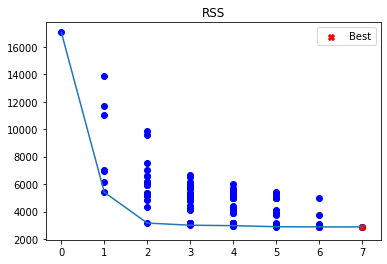

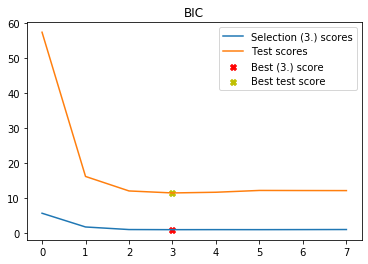

In [87]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

sigma = estimate_sigma(X_train_pd, y_train)
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(rss)), np.argmin, # 2.
                 get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                 candidates_scorer_name="RSS",
                 subsets_scorer_name="BIC",
                 verbose=True)

# Forward Feature Selection

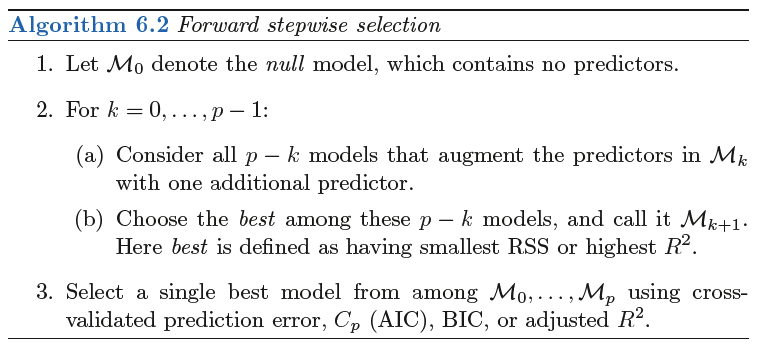

In [88]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []  # <------ !! We keep track of selected features !!
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(len(all_features)):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Given the previous Mk model, test remaining
        # features and select the one providing the best
        # performance increment
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate in (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M0) with 0 features: ['weight']
M0 subset score (3.): 16.2602596282959
............
Best model (M1) with 1 features: ['weight', 'model_year']
M1 subset score (3.): 12.124746322631836
............
Best model (M2) with 2 features: ['weight', 'model_year', 'origin']
M2 subset score (3.): 11.553568840026855
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin', 'displacement']
M3 subset score (3.): 11.753467559814453
............
Best model (M4) with 4 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration']
M4 subset score (3.): 12.268587112426758
............
Best model (M5) with 5 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders']
M5 subset score (3.): 12.241374015808105
............
Best model (M6) with 6 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders', 'horsepower']
M6 subset score (3.): 12.223116874694824


Best configuration has 3 fea

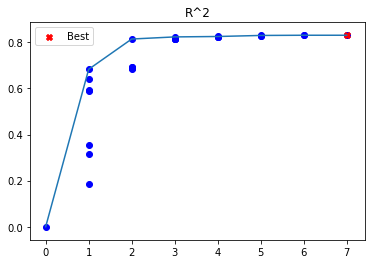

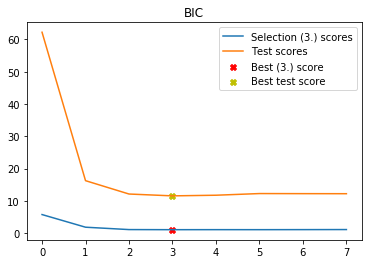

In [89]:
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="BIC",
                  verbose=True)

# Forward Feature Selection with Cross-Validation


............
Best model (M0) with 0 features: ['weight']
M0 subset score (3.): 0.7156165083745584
............
Best model (M1) with 1 features: ['weight', 'model_year']
M1 subset score (3.): 0.7879444501496743
............
Best model (M2) with 2 features: ['weight', 'model_year', 'origin']
M2 subset score (3.): 0.7979340835128499
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin', 'displacement']
M3 subset score (3.): 0.7944379606037454
............
Best model (M4) with 4 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration']
M4 subset score (3.): 0.7854287840852245
............
Best model (M5) with 5 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders']
M5 subset score (3.): 0.7859047126941614
............
Best model (M6) with 6 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders', 'horsepower']
M6 subset score (3.): 0.7862240275606878


Best configuration has 5 f

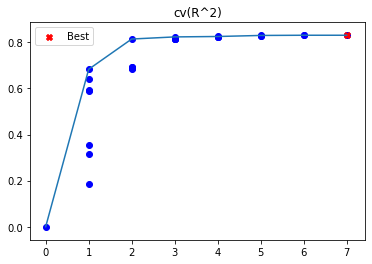

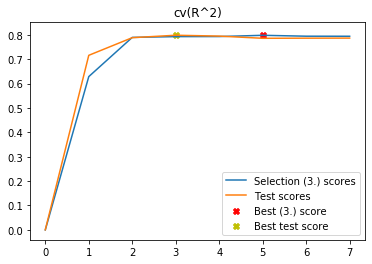

In [101]:
def get_val_evaluator(scorer, val_size=0.3):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=mpg_test_seed)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator


cv = 10
sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  get_val_evaluator(make_scorer(r2_score)), np.argmax, # 3.
                  #et_cv_evaluator(make_scorer(r2_score), cv=10), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)